In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
import math as m
import random
import ContextBandit as cb
from scipy.stats import special_ortho_group as ortho
from mpl_toolkits import mplot3d

In [ ]:
def uncertainty(k, actions, rewards, distances,theta,phi, a):
    t = len(actions)
    k_least = np.argpartition(distances, k - 1)[:k]
    N = sum(np.array(actions)[k_least] == a)
    U = m.sqrt(theta * m.log(t) / N) + phi(t) * distances[k_least[-1]] if (N != 0) else m.inf
    return U
    
def k_ternary_search(actions, rewards, distances, theta, phi, a):
    f = lambda k : uncertainty(k, actions,rewards,distances,theta,phi, a)
    t = len(actions) - 1
    l = 1
    r = t
    while(True):
        c1 = l + m.floor((r - l)/ 3)
        c2 = l + 2 * m.floor((r-l)/3)
        if f(c1) > f(c2):
            l = c1
        elif f(c1)< f(c2):
            r = c2
        else:
            if c1 == c2:
                return c1
            else:
                l,r = c1,c2
        if abs(l-r) <= 1:
            break
    return m.floor((l+r)/2)
        


In [ ]:
def KNN_UCB(bandit,X, theta, phi): ##X:context vector
    n = len(X)
    regrets = []
    n_arms = bandit.k #number of arms
    actions = []
    rewards = []
    assert(n >= n_arms)
    for a in range(n_arms): ##play each arm once regardless of context
        reward = bandit.pull(a, X[a])
        rewards.append(reward)
        actions.append(a)
        regrets.append(bandit.regret)
    for t in range(n_arms,n,1):
        if(t%100 == 0):
            print(t)
        distances= cdist(X[:t], [X[t]], 'Euclidean')
        distances = [dist for sublist in distances for dist in sublist]
        k_a = np.zeros(n_arms)
        index = np.zeros(n_arms) ## to store I_t,k
        for a in range(n_arms): ##evaluate k_a for all a
            k_a[a]= k_ternary_search(actions, rewards, distances, theta, phi, a)
            k_least = np.argpartition(distances, int(k_a[a]-1))[:int(k_a[a])]
            N = sum(np.array(actions)[k_least] == a)
            S = sum(np.array(rewards)[k_least] * (np.array(actions)[k_least] == a))
            f_hat = S/N if (N!=0) else 0
            index[a] = f_hat + m.sqrt(theta* m.log(t)/N) + phi(t) * distances[k_least[-1]] if(N!=0) else m.inf
        arm = np.argmax(index)
        reward = bandit.pull(arm, X[t])
        regrets.append(bandit.regret)
        actions.append(arm)
        rewards.append(reward)
    return actions, rewards, regrets

## Case A: 
$ X_i \in [0,1]^2, 
\\ \mathbb{E}(Y^{a_1}|x) = \prod_{j=1}^2 \sin(4 \pi x_j),
\\ \mathbb{E}(Y^{a_2}|x) = \prod_{j=1}^2 \cos(7 \pi x_j).
$

In [4]:
regretsA = np.loadtxt('regretsA.csv', delimiter=',')

Text(0.2, -0.1, 'Figure 1: Mean regret and standard deviation \n of 50 instances of KNN-UCB in the settings of Case 1')

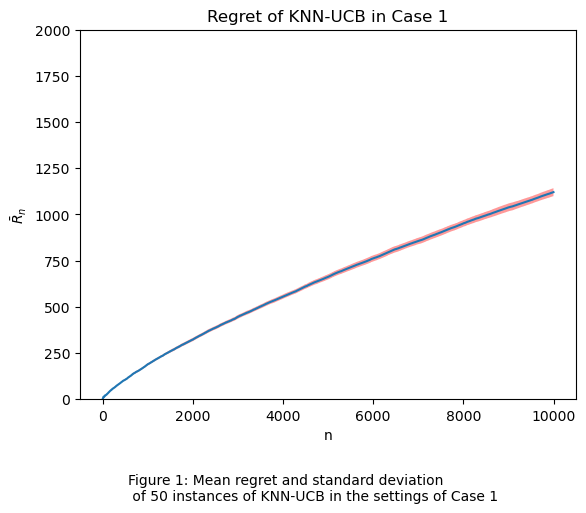

In [8]:
n = range(np.shape(regretsA)[1])
n_trials = np.shape(regretsA)[0]
mean_regretA = np.mean(regretsA, axis = 0)
stds = np.std(regretsA, axis = 0)
plt.xlabel('n')
plt.title('Regret of KNN-UCB in Case 1')
plt.ylabel("$\\bar{R}_n$")
plt.ylim(0,2000)
upper_ci = mean_regretA + (np.array(stds))
lower_ci = mean_regretA - (np.array(stds))
plt.fill_between(n,lower_ci,upper_ci,facecolor='red', alpha=0.4)
plt.plot(n,mean_regretA)
plt.figtext(0.2,-0.1,"Figure 1: Mean regret and standard deviation \n of 50 instances of KNN-UCB in the settings of Case 1")

## Case B:

$ Z \in [0,1]^2, 
\\ X = Z . U[:2],\: for\,some\, orthogonal\, matrix\, U\, with\, dimension\, 3x3
\\ \mathbb{E}(Y^{a_1}|z) = \prod_{j=1}^2 \sin(3 \pi z_j),
\\ \mathbb{E}(Y^{a_2}|z) = \prod_{j=1}^2 \cos(5 \pi z_j)$

In [10]:
regretsB = np.loadtxt('regretsB_knn.csv', delimiter=',')

Text(0.2, -0.1, 'Figure 2: Mean regret and standard deviation \n of 10 instances of KNN-UCB in the settings of Case 2')

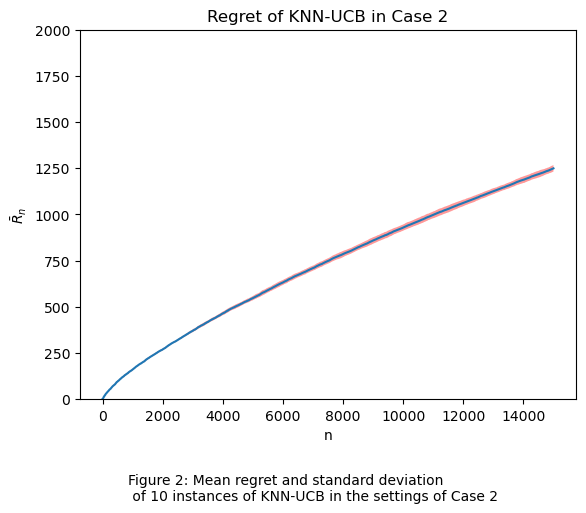

In [11]:
n = range(np.shape(regretsB)[1])
n_trials = np.shape(regretsB[0])
mean_regretB = np.mean(regretsB, axis = 0)
stds2 = np.std(regretsB, axis = 0)
plt.xlabel('n')
plt.title('Regret of KNN-UCB in Case 2')
plt.ylabel("$\\bar{R}_n$")
plt.ylim(0,2000)
upper_ci2 = mean_regretB + (np.array(stds2))
lower_ci2 = mean_regretB - (np.array(stds2))
plt.fill_between(n,lower_ci2,upper_ci2,facecolor='red', alpha=0.4)
plt.plot(n,mean_regretB)
plt.figtext(0.2,-0.1,"Figure 2: Mean regret and standard deviation \n of 10 instances of KNN-UCB in the settings of Case 2")